In [41]:
####################### KPI-1 Completion Rate: The proportion of users who reach the final ‘confirm’ step ##################
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as st

# Load your data
df_final_experiment_clients = pd.read_csv('DataFiles/final_data.csv')

df_final_experiment_clients['Variation'] = df_final_experiment_clients['Variation'].str.strip().str.lower()
clients_started = df_final_experiment_clients['client_id'].nunique()

clients_reached_confirm = df_final_experiment_clients[df_final_experiment_clients['process_step'] == 'confirm']['client_id'].nunique()

overall_completion_rate = (clients_reached_confirm / clients_started) * 100
print(f"Overall Completion Rate: {overall_completion_rate:.2f}%")

test_group_clients = df_final_experiment_clients[df_final_experiment_clients['Variation'] == 'test']
#test_group_clients.to_csv('DataFiles/test_group.csv', index=False)

control_group_clients = df_final_experiment_clients[df_final_experiment_clients['Variation'] == 'control']
#test_group_clients.to_csv('DataFiles/control_group.csv', index=False)

test_group_completion = test_group_clients[test_group_clients['process_step'] == 'confirm']['client_id'].nunique()
control_group_completion = control_group_clients[control_group_clients['process_step'] == 'confirm']['client_id'].nunique()

test_completion_rate = (test_group_completion / test_group_clients['client_id'].nunique()) * 100
control_completion_rate = (control_group_completion / control_group_clients['client_id'].nunique()) * 100

print(f"Test Group Completion Rate: {test_completion_rate:.2f}%")
print(f"Control Group Completion Rate: {control_completion_rate:.2f}%")


Overall Completion Rate: 67.51%
Test Group Completion Rate: 69.27%
Control Group Completion Rate: 65.48%


/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_95703/1650336295.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='Completion Rate (%)', data=data, palette='Blues')


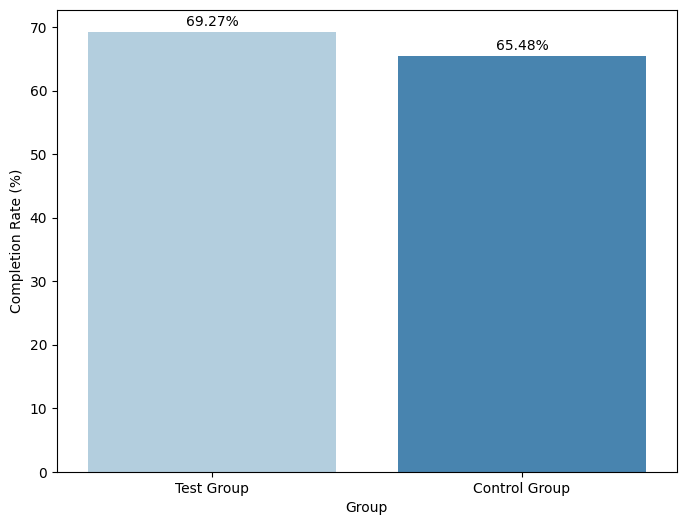

In [43]:
# Create a DataFrame for plotting
data = pd.DataFrame({
    'Group': ['Test Group', 'Control Group'],
    'Completion Rate (%)': [test_completion_rate, control_completion_rate]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Completion Rate (%)', data=data, palette='Blues')
for index, row in data.iterrows():
    plt.text(index, row['Completion Rate (%)'] + 1, f'{row["Completion Rate (%)"]:.2f}%', ha='center')
plt.show()

In [39]:
##################### KPI 2 - test Group- Time Spent on Each Step: The average duration users spend on each step ##########################
test_group_clients['date_time'] = pd.to_datetime(test_group_clients['date_time'])
test_group_clients = test_group_clients.sort_values(by=['client_id', 'date_time'])

test_group_clients['date_time'] = test_group_clients.groupby('client_id')['date_time'].diff()
test_group_average_time_per_step = test_group_clients.groupby('process_step')['date_time'].mean()

print("Test Group-Average Time Spent on Each Step:")
print(test_group_average_time_per_step)

##################### KPI 2 - Control Group- Time Spent on Each Step: The average duration users spend on each step ##########################

control_group_clients['date_time'] = pd.to_datetime(control_group_clients['date_time'])
control_group_clients = control_group_clients.sort_values(by=['client_id', 'date_time'])

control_group_clients['date_time'] = control_group_clients.groupby('client_id')['date_time'].diff()
control_group_average_time_per_step = control_group_clients.groupby('process_step')['date_time'].mean()

print("Control Group-Average Time Spent on Each Step:")
print(control_group_average_time_per_step)

/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_95703/3147440675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_group_clients['date_time'] = pd.to_datetime(test_group_clients['date_time'])


Test Group-Average Time Spent on Each Step:
process_step
confirm   1 days 04:49:26.815460953
start     3 days 01:51:27.687523152
step_1    0 days 00:22:25.103260305
step_2    0 days 00:01:51.497780370
step_3    0 days 00:08:05.844766043
Name: date_time, dtype: timedelta64[ns]
Control Group-Average Time Spent on Each Step:
process_step
confirm   0 days 17:53:15.779722703
start     4 days 03:53:09.257277308
step_1    0 days 00:30:52.666348676
step_2    0 days 00:00:39.267891193
step_3    0 days 00:09:38.105788775
Name: date_time, dtype: timedelta64[ns]


/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_95703/3147440675.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_group_clients['date_time'] = pd.to_datetime(control_group_clients['date_time'])


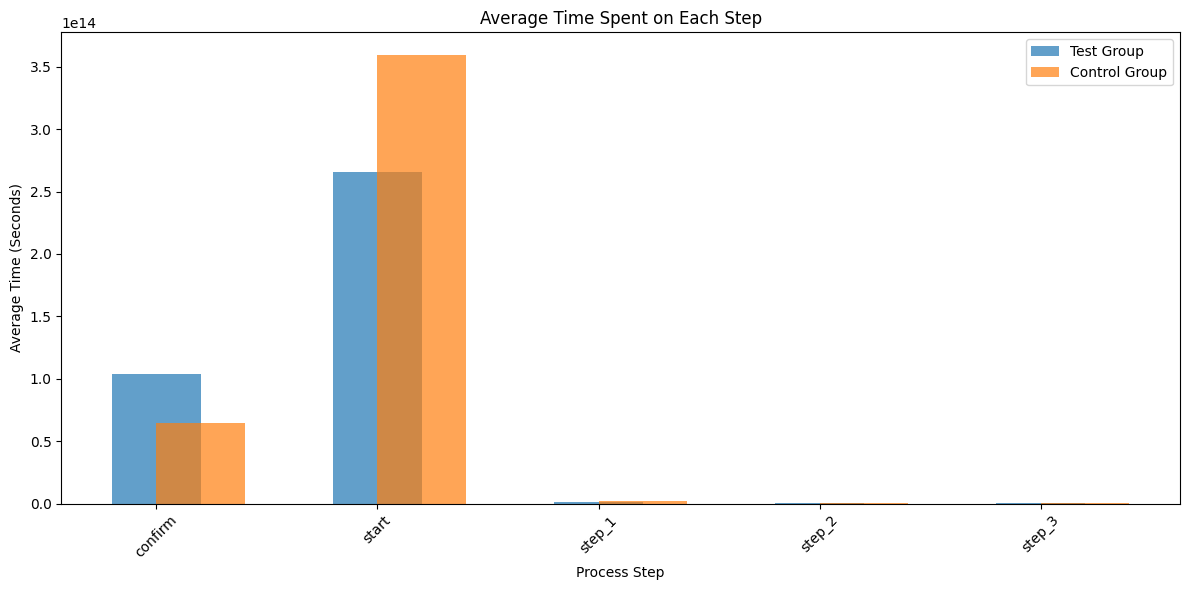

In [37]:
# Plotting the average time spent on each step
plt.figure(figsize=(12, 6))

# Create a bar plot
plt.bar(test_group_average_time_per_step.index, test_group_average_time_per_step, width=0.4, label='Test Group', alpha=0.7)
plt.bar(control_group_average_time_per_step.index, control_group_average_time_per_step, width=0.4, label='Control Group', alpha=0.7, align='edge')

# Adding labels and title
plt.xlabel('Process Step')
plt.ylabel('Average Time (Seconds)')
plt.title('Average Time Spent on Each Step')
plt.legend()

# Show the plot
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


Test group errors: 103373
Control group errors: 83970
Total backward movements/errors for all clients: 187343
Errors per client in overall experiment:
client_id  visit_id                    
555        637149525_38041617439_716659    4
647        40369564_40101682850_311847     4
1028       557292053_87239438319_391157    4
1186       795373564_99931517312_810896    2
1195       393817425_39015278493_996341    4
                                          ..
9999626    182723364_27031318473_880901    1
9999729    493310979_9209676464_421146     2
           870243567_56915814033_814203    4
           99583652_41711450505_426179     1
9999832    472154369_16714624241_585315    1
Name: process_step, Length: 52205, dtype: int64


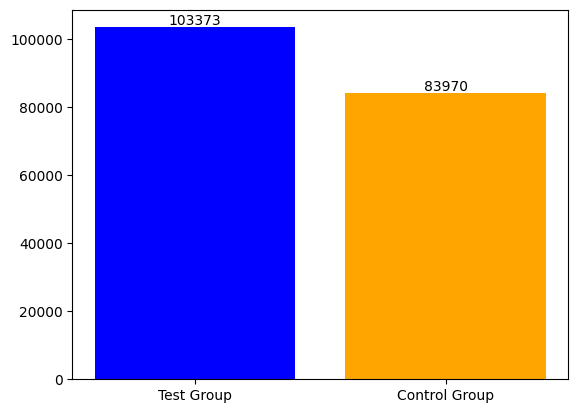

In [45]:
#########Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error. 
########You should consider moving from a later step to an earlier one as an error.

df_final_experiment_clients['Variation'] = df_final_experiment_clients['Variation'].str.strip().str.lower()

step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

step_order_dict = pd.Series(range(len(step_order)), index=step_order).to_dict()

def count_backward_movements(steps):
    errors = 0
    previous_index = -1 

    for step in steps:
        current_index = step_order_dict[step] 
        if current_index < previous_index:
            errors += 1
        previous_index = current_index

    return errors
    
# Calculate test group errors
test_group_error = test_group_clients.groupby(['client_id', 'visit_id'])['process_step'].apply(list)
test_group_error = test_group_error.apply(count_backward_movements)
test_group_total_errors = test_group_error.sum()
print(f"Test group errors: {test_group_total_errors}")

# Calculate control group errors
control_group_error = control_group_clients.groupby(['client_id', 'visit_id'])['process_step'].apply(list)
control_group_error = control_group_error.apply(count_backward_movements)
control_group_total_errors = control_group_error.sum()  
print(f"Control group errors: {control_group_total_errors}")

# Calculate total errors
df_final_experiment_errors = df_final_experiment_clients.groupby(['client_id', 'visit_id'])['process_step'].apply(list).apply(count_backward_movements)
total_errors = df_final_experiment_errors.sum()
print(f"Total backward movements/errors for all clients: {total_errors}")

# Optionally, show errors for each client
print("Errors per client in overall experiment:")
print(df_final_experiment_errors[df_final_experiment_errors > 0])

# Bar plot 
labels = ['Test Group', 'Control Group']
error_counts = [test_group_total_errors, control_group_total_errors]

plt.bar(labels, error_counts, color=['blue', 'orange'])
for index, count in enumerate(error_counts):
    plt.text(index, count + 1, f'{count}', ha='center', va='bottom')
plt.show()


In [46]:
# H0: There is no significant difference in the completion rates between the Test and Control groups.
# H1: The completion rate for the Test group is significantly higher than that of the Control group.
# Perform a Two Sample T-test
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Prepare the data for T-test
test_completions = np.array(test_group_clients['process_step'] == 'confirm', dtype=int)
control_completions = np.array(control_group_clients['process_step'] == 'confirm', dtype=int)

# Perform T-test
t_stat, p_value = ttest_ind(test_completions, control_completions, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4e}")

# Hypothesis Testing
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. The completion rate for the Test group is significantly different from the Control group.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in completion rates between the Test and Control groups.")

T-Statistic: 18.9643, P-Value: 3.7323e-80
Reject the null hypothesis. The completion rate for the Test group is significantly different from the Control group.


In [49]:
# Calculate the difference in completion rates
rate_difference = test_completion_rate - control_completion_rate

# Check if the difference meets the 5% threshold
threshold = 0.05

# Output results
print(f"Test Group Completion Rate: {test_completion_rate:.2f}%")
print(f"Control Group Completion Rate: {control_completion_rate:.2f}%")
print(f"Increase in Completion Rate: {rate_difference:.2f}%")

if rate_difference >= threshold:
    print(f"The observed increase of {rate_difference:.2%} meets or exceeds the 5% threshold.")
else:
    print(f"The observed increase of {rate_difference:.2%} does not meet the 5% threshold.")


Test Group Completion Rate: 69.27%
Control Group Completion Rate: 65.48%
Increase in Completion Rate: 3.80%
The observed increase of 379.56% meets or exceeds the 5% threshold.


In [51]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_final_experiment_clients['Variation'], df_final_experiment_clients['process_step'] == 'confirm')
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat:.4f}, P-Value: {p_val:.4e}")

if p_val < alpha:
    print("Reject the null hypothesis. There is a significant association between the design variation and completion.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between the design variation and completion.")


Chi-Square Statistic: 353.4311, P-Value: 7.5856e-79
Reject the null hypothesis. There is a significant association between the design variation and completion.


In [53]:
# Get the number of unique clients in the test and control groups
test_clients = test_group_clients['client_id'].nunique()
control_clients = control_group_clients['client_id'].nunique()

# Calculate the ratio of Test to Control clients
ratio = test_clients / control_clients

# Print the ratio, formatted to two decimal places
print(f"Ratio of Test to Control clients: {ratio:.2f}")
#If the ratio is not close to 1, it suggests that the clients were not evenly divided. 
# there is significant imbalance and it might indicate potential bias.

Ratio of Test to Control clients: 1.15
